# Module 1 / Project 3 / Capital bike_copy Share



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime # Alternative to Datetime64[ns] with more options to process time.
from datetime import date
import calendar

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from numpy import mean
from numpy import std

#plt.rcParams['figure.dpi'] = 100   # Setting the resolution of the plots we get.
#plt.rcParams['savefig.dpi'] = 100

# Observations and learnings of this project.

## Datetime import 
Alternative to Datetime64[ns] with more options to process time.

## Combine multiple CSV's with same fields/features into one CSV with 8 lines of code.
import os
import glob
import pandas as pd
os.chdir("2012-capitalbikeshare-tripdata")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

##


In [2]:
# Import CSV

load_csv = pd.read_csv("CSV/combined.csv")


In [3]:
# Import CSV

weather_2011 = pd.read_csv("CSV/washington dc 2011-01-01 to 2012-12-31.csv")


In [6]:
weather_2011.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,washington dc,2011-01-01,14.1,1.2,8.1,14.1,1.2,7.9,5.2,82.3,...,4.1,3,NaN,2011-01-01T07:26:50,2011-01-01T16:56:37,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
1,washington dc,2011-01-02,14.2,2.0,9.2,14.2,-1.5,7.4,3.7,70.3,...,3.9,2,NaN,2011-01-02T07:26:57,2011-01-02T16:57:26,0.99,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
2,washington dc,2011-01-03,4.0,-2.1,0.6,0.7,-8.4,-3.7,-10.5,44.2,...,10.9,5,NaN,2011-01-03T07:27:03,2011-01-03T16:58:17,1.00,Clear,Clear conditions throughout the day.,clear-day,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
3,washington dc,2011-01-04,5.8,-3.4,0.7,2.6,-6.7,-2.3,-6.4,59.9,...,9.8,5,NaN,2011-01-04T07:27:06,2011-01-04T16:59:09,0.00,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
4,washington dc,2011-01-05,5.9,-0.9,2.4,4.7,-4.4,-0.8,-9.1,43.6,...,9.3,5,NaN,2011-01-05T07:27:07,2011-01-05T17:00:02,0.01,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."


In [7]:
weather_11 = weather_2011.copy(deep=True)

### After loading the CSV file copy the Dataframe once more so that we can leave the original DF as it is. (Deep = True means that the original DF isnät changed when we change or manipulate the copied DF)

In [3]:
bike_copy = load_csv.copy(deep=True)



In [4]:
bike_copy

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,485,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,471,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...
3255673,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
3255674,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
3255675,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
3255676,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [5]:
# check for how many NaN(written value) we have

bike_copy.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [6]:
#bike_copy.Member type(because of the gap inbetween wont work)
bike_copy['Member type']

0          Member
1          Casual
2          Member
3          Member
4          Member
            ...  
3255673    Member
3255674    Member
3255675    Member
3255676    Member
3255677    Member
Name: Member type, Length: 3255678, dtype: object

when we check the unique items in list

In [5]:
bike_copy['Member type'].unique()

array(['Member', 'Casual', 'Unknown'], dtype=object)

this way gives u directly the number of different items

In [8]:
display(bike_copy['Start station'].nunique())
display(bike_copy['End station'].nunique())
display(bike_copy['Bike number'].nunique())


194

194

1771

In [9]:

bike_copy["Member type"].value_counts()

Member     2636066
Casual      619591
Unknown         21
Name: Member type, dtype: int64

how to drop from a column based on cell values

In [10]:
bike_copy=bike_copy.loc[(bike_copy["Member type"] != "Unknown") ]

another way to drop cell values from a column

In [11]:
#bike_copy.sort_values(by="Member type",inplace=True)
#bike_copy

if we drop the last 21 lines of member type,will take into consideration the original index,so we need to reindex.


In [12]:
#if we dont set Drop=TRue then the old index will become column in the reindexed dataframe.
#bike_copy.reset_index(inplace=True,drop=True)
#bike_copy

In [13]:
#bike_copy.tail(21)
#bike_copy.tail(21).index



In [14]:
#bike_copy.drop(bike_copy.tail(21).index,inplace=True)
#bike_copy

In [15]:
bike_copy=bike_copy.loc[(bike_copy["Member type"] != "Unknown") ]
bike_copy


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,485,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,471,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...
3255673,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
3255674,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
3255675,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
3255676,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [16]:
#bike_copy.drop(['Bike number','End station number','Start station number'],inplace=True, axis=1)

In [17]:
bike_copy

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,485,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,471,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...
3255673,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
3255674,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
3255675,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
3255676,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [18]:
bike_copy[bike_copy.duplicated(["Start date", "End date",'Start station','End station'], keep=False)]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
785,579,2012-01-01 13:10:29,2012-01-01 13:20:08,31208,M St & New Jersey Ave SE,31609,Maine Ave & 7th St SW,W01300,Member
786,579,2012-01-01 13:10:29,2012-01-01 13:20:08,31208,M St & New Jersey Ave SE,31609,Maine Ave & 7th St SW,W01341,Member
18098,167,2012-01-07 14:29:20,2012-01-07 14:32:08,31228,8th & H St NW,31620,5th & F St NW,W00970,Member
18099,168,2012-01-07 14:29:20,2012-01-07 14:32:08,31228,8th & H St NW,31620,5th & F St NW,W00978,Member
19937,609,2012-01-07 19:35:23,2012-01-07 19:45:33,31221,18th & M St NW,31104,Adams Mill & Columbia Rd NW,w00059,Member
...,...,...,...,...,...,...,...,...,...
3233320,643,2011-12-20 21:30:56,2011-12-20 21:41:40,31614,11th & H St NE,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W01123,Member
3255598,577,2011-12-31 21:51:22,2011-12-31 22:00:59,31106,Calvert & Biltmore St NW,31229,New Hampshire Ave & T St NW,W00623,Member
3255599,577,2011-12-31 21:51:22,2011-12-31 22:00:59,31106,Calvert & Biltmore St NW,31229,New Hampshire Ave & T St NW,W01467,Member
3255641,286,2011-12-31 22:50:50,2011-12-31 22:55:37,31245,7th & R St NW / Shaw Library,31111,10th & U St NW,W01178,Member


how to drop duplicates from your dataframe
with this (ignore_index=True) we take a new continious index

In [19]:
bike_copy.drop_duplicates(subset=["Start date", "End date",'Start station','End station'],inplace=True,ignore_index=True)
bike_copy


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,485,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,471,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...
3255364,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
3255365,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
3255366,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
3255367,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


End of a typical Wrangling

We convert duration from sec to min,round them in the 2nd decimal

In [20]:
round(bike_copy.Duration/60,2)

0           7.92
1          19.37
2          19.08
3           8.08
4           7.85
           ...  
3255364     5.00
3255365     6.45
3255366     4.35
3255367    34.33
3255368     7.80
Name: Duration, Length: 3255369, dtype: float64

we replace the duration column after our change

In [21]:
bike_copy.Duration=round(bike_copy.Duration/60,2)


In [22]:
#bike_copy = load_csv.copy(deep=True)
#bike_copy=bike_copy.loc[(bike_copy["Member type"] != "Unknown") ]
#bike_copy.reset_index(inplace=True,drop=True)
#bike_copy.Duration=round(bike_copy.Duration/60,2)
#
#bike_copy["Start date"] = pd.to_datetime(bike_copy["Start date"],dayfirst=True,yearfirst =False)
#
#bike_copy["Year"]=pd.DatetimeIndex(bike_copy['Start date']).Year
#bike_copy["Month"]=pd.DatetimeIndex(bike_copy['Start date']).month
#bike_copy["Day"]=pd.DatetimeIndex(bike_copy['Start date']).day
#bike_copy["Weekday"]=pd.DatetimeIndex(bike_copy['Start date']).weekday
#
#bike_copy.drop(['Bike number','End station number','Start station number'],inplace=True, axis=1)
#bike_copy.drop_duplicates(subset=["Start date", "End date",'Start station','End station'],inplace=True,ignore_index=True)
#bike_copy=bike_copy.loc[(bike_copy["Duration"] >3) ]
#bike_copy.reset_index(inplace=True,drop=True)
#bike_copy

In [23]:
#bike12=bike_copy.loc[(bike_copy["Year"] != 2011) ]
#bike11=bike_copy.loc[(bike_copy["Year"] != 2012) ]
#
#display(bike12.head())
#display(bike11.head())

In [24]:
#bike_copy.sort_values(by="Member type",inplace=True)

In [25]:

#bike_copy["Member type"].value_counts()



In [26]:
#import matplotlib.pyplot as plt
#
## Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Member', 'Casual ',
#sizes = [2525330, 616920]
#explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'White Wines')
#
#fig1, ax1 = plt.subplots()
#ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#
#plt.show()

In [27]:
bike_copy.dtypes

Duration                float64
Start date               object
End date                 object
Start station number      int64
Start station            object
End station number        int64
End station              object
Bike number              object
Member type              object
dtype: object

pd.DatetimeIndex you can use this code only if the items are daytime objects

In [28]:
#bike_copy["Start date"] = pd.to_datetime(bike_copy["Start date"],dayfirst=True,yearfirst =False)


In [29]:
'''#Create new columns based on datetime date.
bike_copy["Year"]=pd.DatetimeIndex(bike_copy['Start date']).Year
bike_copy["Month"]=pd.DatetimeIndex(bike_copy['Start date']).month
bike_copy["Day"]=pd.DatetimeIndex(bike_copy['Start date']).day
bike_copy["Weekday"]=pd.DatetimeIndex(bike_copy['Start date']).weekday
bike_copy'''


'#Create new columns based on datetime date.\nbike_copy["Year"]=pd.DatetimeIndex(bike_copy[\'Start date\']).Year\nbike_copy["Month"]=pd.DatetimeIndex(bike_copy[\'Start date\']).month\nbike_copy["Day"]=pd.DatetimeIndex(bike_copy[\'Start date\']).day\nbike_copy["Weekday"]=pd.DatetimeIndex(bike_copy[\'Start date\']).weekday\nbike_copy'

after any groupby method, we add at the end,what we want to do.

In [30]:
#bike_copy=bike_copy.groupby(by='Weekday').count()
#bike_copy

In [31]:
bike_copy.reset_index(inplace=True,)
bike_copy

,index,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,0,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,2,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,3,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,4,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...,...
3255364,3255364,5.00,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
3255365,3255365,6.45,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
3255366,3255366,4.35,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
3255367,3255367,34.33,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [32]:
#bike11=bike11.groupby(by='Weekday').count()
#bike11
#bike11.reset_index(inplace=True,)
#bike11

In [33]:
#bike12=bike12.groupby(by='Weekday').count()
#bike12
#bike12.reset_index(inplace=True,)
#bike12

In [34]:
#bike_copy['Weekday'] = pd.Categorical(bike_copy['Weekday'], ordered=True)
#
#bike11['Weekday'] = pd.Categorical(bike11['Weekday'], ordered=True)
#
#bike12['Weekday'] = pd.Categorical(bike12['Weekday'], ordered=True)

In [35]:
#bike_copy['Weekday'] = bike_copy['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
#4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})
#
#bike11['Weekday'] = bike11['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
#4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})
#
#bike12['Weekday'] = bike12['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
#4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})

# Change the title names of Y axis


In [36]:
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255369 entries, 0 to 3255368
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   index                 int64  
 1   Duration              float64
 2   Start date            object 
 3   End date              object 
 4   Start station number  int64  
 5   Start station         object 
 6   End station number    int64  
 7   End station           object 
 8   Bike number           object 
 9   Member type           object 
dtypes: float64(1), int64(3), object(6)
memory usage: 248.4+ MB


In [37]:
bike_copy

,index,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,0,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,2,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,3,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,4,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member
...,...,...,...,...,...,...,...,...,...,...
3255364,3255364,5.00,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
3255365,3255365,6.45,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
3255366,3255366,4.35,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
3255367,3255367,34.33,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [64]:
bike_copy=load_csv.copy(deep=True)
bike_copy=bike_copy.loc[(bike_copy["Member type"] != "Unknown") ]
bike_copy.reset_index(inplace=True,drop=True)
bike_copy.Duration=round(bike_copy.Duration/60,2)
bike_copy.drop(['Bike number','End station number','Start station number'],inplace=True, axis=1)
bike_copy.drop_duplicates(subset=["Start date", "End date",'Start station','End station'],inplace=True,ignore_index=True)
bike_copy=bike_copy.loc[(bike_copy["Duration"] >3) ]
bike_copy.reset_index(inplace=True,drop=True)
bike_copy["Year"]=pd.DatetimeIndex(bike_copy['Start date']).year

bike_copy["Day"]=pd.DatetimeIndex(bike_copy['Start date']).day

bike_copy["Weekday"]=pd.DatetimeIndex(bike_copy['Start date']).weekday
bike_copy['Weekday'] = pd.Categorical(bike_copy['Weekday'], ordered=True)
bike_copy['Weekday'] = bike_copy['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})


bike_copy["Month"]=pd.DatetimeIndex(bike_copy['Start date']).month
bike_copy['Month'] = pd.Categorical(bike_copy['Month'], ordered=True)
bike_copy['Month'] = bike_copy['Month'].map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr',
5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

bike_copy["Hour"]=pd.DatetimeIndex(bike_copy['Start date']).hour
bike_copy['Hour'] = pd.Categorical(bike_copy['Hour'], ordered=True)
#bike_copy['Weekday'] = bike_copy['Weekday'].map({0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
#4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})



bike_copy

,Duration,Start date,End date,Start station,End station,Member type,Year,Day,Weekday,Month,Hour
0,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,7th & R St NW / Shaw Library,7th & T St NW,Member,2012,1,Sun,Jan,0
1,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,2012,1,Sun,Jan,0
2,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Member,2012,1,Sun,Jan,0
3,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,14th & V St NW,Park Rd & Holmead Pl NW,Member,2012,1,Sun,Jan,0
4,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,11th & Kenyon St NW,7th & T St NW,Member,2012,1,Sun,Jan,0
...,...,...,...,...,...,...,...,...,...,...,...
3142245,5.00,2011-12-31 23:41:19,2011-12-31 23:46:20,15th & P St NW,17th & Corcoran St NW,Member,2011,31,Sat,Dec,23
3142246,6.45,2011-12-31 23:46:43,2011-12-31 23:53:10,Convention Center / 7th & M St NW,15th & P St NW,Member,2011,31,Sat,Dec,23
3142247,4.35,2011-12-31 23:47:27,2011-12-31 23:51:49,Lamont & Mt Pleasant NW,Park Rd & Holmead Pl NW,Member,2011,31,Sat,Dec,23
3142248,34.33,2011-12-31 23:55:12,2012-01-01 00:29:33,21st & I St NW,New York Ave & 15th St NW,Member,2011,31,Sat,Dec,23


In [53]:
load_csv.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member
3,485,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member
4,471,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member


In [54]:
bike_copy.head()

,Duration,Start date,End date,Start station,End station,Member type,Year,Day,Weekday,Month,Hour
0,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,7th & R St NW / Shaw Library,7th & T St NW,Member,2012,1,Sun,Jan,0
1,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,2012,1,Sun,Jan,0
2,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Member,2012,1,Sun,Jan,0
3,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,14th & V St NW,Park Rd & Holmead Pl NW,Member,2012,1,Sun,Jan,0
4,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,11th & Kenyon St NW,7th & T St NW,Member,2012,1,Sun,Jan,0


In [55]:
bike_copy["Member type"].value_counts()

Member    2525330
Casual     616920
Name: Member type, dtype: int64

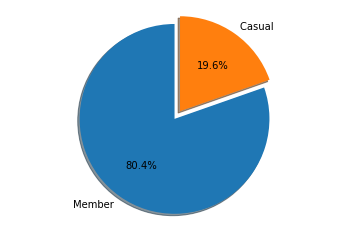

In [56]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Member', 'Casual ',
sizes = [2525330, 616920]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'White Wines')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [65]:
bike_weekdays=bike_copy[["Weekday", "Year"]]
bike_weekdays=bike_weekdays.groupby(["Weekday", "Year"]).value_counts()
bike_weekdays

Weekday  Year
Mon      2011    172143
         2012    261649
Tue      2011    172062
         2012    274611
Wed      2011    161204
         2012    289053
Thu      2011    166202
         2012    296031
Fri      2011    173713
         2012    291151
Sat      2011    172903
         2012    286197
Sun      2011    170220
         2012    255111
dtype: int64

In [66]:
bike_copy

,Duration,Start date,End date,Start station,End station,Member type,Year,Day,Weekday,Month,Hour
0,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,7th & R St NW / Shaw Library,7th & T St NW,Member,2012,1,Sun,Jan,0
1,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,2012,1,Sun,Jan,0
2,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Member,2012,1,Sun,Jan,0
3,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,14th & V St NW,Park Rd & Holmead Pl NW,Member,2012,1,Sun,Jan,0
4,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,11th & Kenyon St NW,7th & T St NW,Member,2012,1,Sun,Jan,0
...,...,...,...,...,...,...,...,...,...,...,...
3142245,5.00,2011-12-31 23:41:19,2011-12-31 23:46:20,15th & P St NW,17th & Corcoran St NW,Member,2011,31,Sat,Dec,23
3142246,6.45,2011-12-31 23:46:43,2011-12-31 23:53:10,Convention Center / 7th & M St NW,15th & P St NW,Member,2011,31,Sat,Dec,23
3142247,4.35,2011-12-31 23:47:27,2011-12-31 23:51:49,Lamont & Mt Pleasant NW,Park Rd & Holmead Pl NW,Member,2011,31,Sat,Dec,23
3142248,34.33,2011-12-31 23:55:12,2012-01-01 00:29:33,21st & I St NW,New York Ave & 15th St NW,Member,2011,31,Sat,Dec,23


,Weekday,count
0,Mon,433792
1,Tue,446673
2,Wed,450257
3,Thu,462233
4,Fri,464864
5,Sat,459100
6,Sun,425331


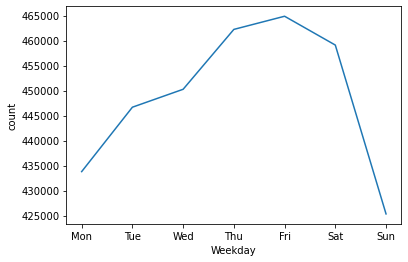

In [58]:
bike_temp=bike_copy[["Weekday"]]
bike_temp=bike_temp.groupby(["Weekday"]).value_counts()
bike_temp

bike_temp=bike_temp.reset_index()
bike_temp=bike_temp.rename({0:"count"}, axis=1)
sns.lineplot(x=bike_temp["Weekday"], y=bike_temp["count"], sort=False)
bike_temp.head(7)

,Duration,Start date,End date,Start station,End station,Member type,Year,Day,Weekday,Month,Hour
0,7.92,2012-01-01 00:04:00,2012-01-01 00:11:56,7th & R St NW / Shaw Library,7th & T St NW,Member,2012,1,Sun,Jan,0
1,19.37,2012-01-01 00:10:05,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,2012,1,Sun,Jan,0
2,19.08,2012-01-01 00:10:23,2012-01-01 00:29:28,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Member,2012,1,Sun,Jan,0
3,8.08,2012-01-01 00:15:41,2012-01-01 00:23:46,14th & V St NW,Park Rd & Holmead Pl NW,Member,2012,1,Sun,Jan,0
4,7.85,2012-01-01 00:15:42,2012-01-01 00:23:34,11th & Kenyon St NW,7th & T St NW,Member,2012,1,Sun,Jan,0
...,...,...,...,...,...,...,...,...,...,...,...
3142245,5.00,2011-12-31 23:41:19,2011-12-31 23:46:20,15th & P St NW,17th & Corcoran St NW,Member,2011,31,Sat,Dec,23
3142246,6.45,2011-12-31 23:46:43,2011-12-31 23:53:10,Convention Center / 7th & M St NW,15th & P St NW,Member,2011,31,Sat,Dec,23
3142247,4.35,2011-12-31 23:47:27,2011-12-31 23:51:49,Lamont & Mt Pleasant NW,Park Rd & Holmead Pl NW,Member,2011,31,Sat,Dec,23
3142248,34.33,2011-12-31 23:55:12,2012-01-01 00:29:33,21st & I St NW,New York Ave & 15th St NW,Member,2011,31,Sat,Dec,23


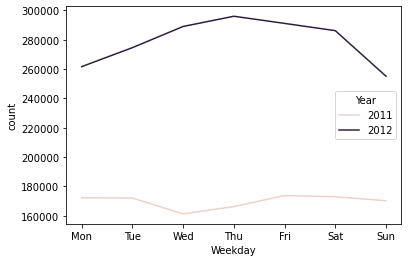

In [67]:
bike_weekdays=bike_weekdays.reset_index()
bike_weekdays=bike_weekdays.rename({0:"count"}, axis=1)
sns.lineplot(x=bike_weekdays["Weekday"], y=bike_weekdays["count"], hue=bike_weekdays["Year"], sort=False)
display(bike_copy)

In [68]:
bike_months = bike_copy[["Month", "Year"]]
bike_months = bike_months.groupby(["Month", "Year"]).value_counts()
bike_months

Month  Year
Jan    2011     36077
       2012     91303
Feb    2011     45903
       2012     97397
Mar    2011     60929
       2012    157444
Apr    2011     90351
       2012    166664
May    2011    130456
       2012    187578
Jun    2011    138103
       2012    194285
Jul    2011    135954
       2012    194666
Aug    2011    131102
       2012    204608
Sep    2011    122115
       2012    208926
Oct    2011    117952
       2012    189594
Nov    2011     97198
       2012    144648
Dec    2011     82307
       2012    116690
dtype: int64

,Month,Year,count
0,Jan,2011,36077
1,Jan,2012,91303
2,Feb,2011,45903
3,Feb,2012,97397
4,Mar,2011,60929
5,Mar,2012,157444
6,Apr,2011,90351
7,Apr,2012,166664
8,May,2011,130456
9,May,2012,187578


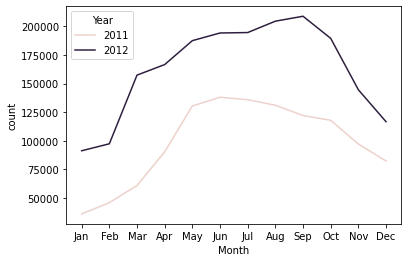

In [69]:
temp_months=bike_months.reset_index()
temp_months=temp_months.rename({0:"count"}, axis=1)
sns.lineplot(x=temp_months["Month"], y=temp_months["count"], hue=temp_months["Year"], sort=False)
temp_months

In [71]:
bike_hour=bike_copy[["Hour", "Year"]]
bike_hour=bike_hour.groupby(["Hour", "Year"]).value_counts()
bike_hour


Hour  Year
0     2011     14683
      2012     22155
1     2011      9027
      2012     13649
2     2011      6254
      2012      9016
3     2011      3272
      2012      4406
4     2011      1714
      2012      2393
5     2011      4791
      2012      8413
6     2011     19385
      2012     32083
7     2011     54209
      2012     92399
8     2011     91154
      2012    157657
9     2011     56833
      2012     95008
10    2011     45405
      2012     75203
11    2011     54161
      2012     90526
12    2011     66072
      2012    109831
13    2011     66308
      2012    110440
14    2011     63639
      2012    104682
15    2011     65825
      2012    109990
16    2011     82188
      2012    136311
17    2011    123148
      2012    201476
18    2011    112446
      2012    184692
19    2011     81898
      2012    133938
20    2011     59789
      2012     96104
21    2011     46585
      2012     72198
22    2011     35882
      2012     54687
23    2011     23779
  

([<matplotlib.axis.XTick at 0x28ea52400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

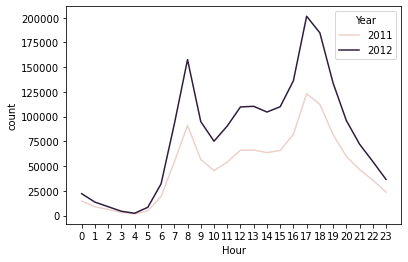

In [102]:
temp_hour=bike_hour.reset_index()
temp_hour=temp_hour.rename({0:"count"}, axis=1)
sns.lineplot(x=temp_hour["Hour"], y=temp_hour["count"], hue=temp_hour["Year"], sort=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21 ,22, 23])
#temp_hour

[Text(0.5, 1.0, 'Top 10 Start Stations')]

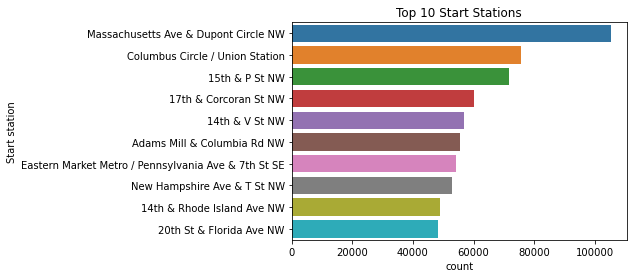

In [73]:
# Top 10 Start Stations
bike_stations=bike_copy[["Start station"]]
bike_stations=bike_stations.groupby(["Start station"]).value_counts()
bike_stations = bike_stations.reset_index()
bike_stations=bike_stations.rename({0:"count"}, axis=1)
top10_start = bike_stations.sort_values('count',ascending=False).head(10)
top10_start.head(10)
sns.barplot(x="count", y="Start station", data=top10_start).set(title='Top 10 Start Stations')

[Text(0.5, 1.0, 'Top 10 End stations')]

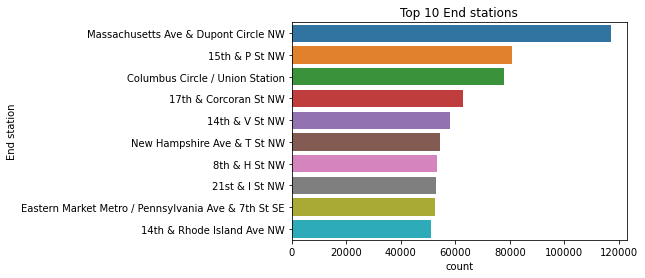

In [74]:
# Top 10 End Stations
bike_stations=bike_copy[["End station"]]
bike_stations=bike_stations.groupby(["End station"]).value_counts()
bike_stations = bike_stations.reset_index()
bike_stations=bike_stations.rename({0:"count"}, axis=1)
top10_end = bike_stations.sort_values('count',ascending=False).head(10)
top10_end.head(10)
sns.barplot(x="count", y="End station", data=top10_end).set(title='Top 10 End stations')

[Text(0.5, 1.0, 'Bottom 10 Start stations')]

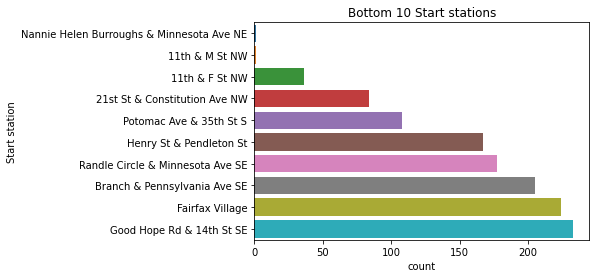

In [75]:
# Bottom 10 Start Stations
bike_stations=bike_copy[["Start station"]]
bike_stations=bike_stations.groupby(["Start station"]).value_counts()
bike_stations = bike_stations.reset_index()
bike_stations=bike_stations.rename({0:"count"}, axis=1)
bot10_start = bike_stations.sort_values('count',ascending=True).head(10)
bot10_start.head(10)
sns.barplot(x="count", y="Start station", data=bot10_start).set(title='Bottom 10 Start stations')

,End station
0,7th & T St NW
1,16th & Harvard St NW
2,16th & Harvard St NW
3,Park Rd & Holmead Pl NW
4,7th & T St NW


[Text(0.5, 1.0, 'Bottom 10 End stations')]

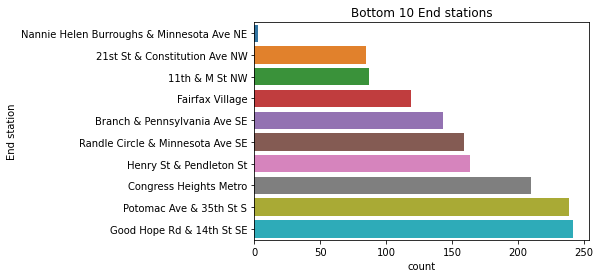

In [76]:
# Bottom 10 End Stations
bike_stations=bike_copy[["End station"]]
display(bike_stations.head())
bike_stations=bike_stations.groupby(["End station"]).value_counts()
bike_stations = bike_stations.reset_index()
bike_stations=bike_stations.rename({0:"count"}, axis=1)
bot10_start = bike_stations.sort_values('count',ascending=True).head(10)
bot10_start.head(10)
sns.barplot(x="count", y="End station", data=bot10_start).set(title='Bottom 10 End stations')

,Weekday,Member type,count
10,Sat,Member,305810
11,Sat,Casual,153290
12,Sun,Member,285314
13,Sun,Casual,140017


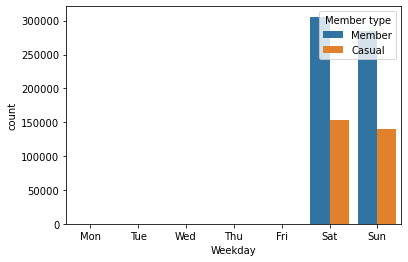

In [77]:

bike_weekend = bike_copy.loc[(bike_copy["Weekday"] == "Sat") | (bike_copy["Weekday"] == "Sun")]
bike_weekend=bike_weekend[["Member type","Weekday"]]
#display(bike_weekend.info())
#display(bike_weekend['Weekday'].unique())
bike_weekend = bike_weekend.groupby(["Weekday"]).value_counts()
bike_weekend = bike_weekend.reset_index()
bike_weekend = bike_weekend.rename({0:"count"}, axis=1)
bike_weekend=bike_weekend.iloc[10:]



sns.barplot(x=bike_weekend["Weekday"], y=bike_weekend["count"], hue=bike_weekend["Member type"])


bike_weekend



<AxesSubplot:xlabel='Weekday', ylabel='count'>

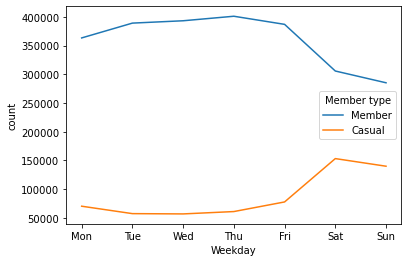

In [79]:
bike_weekday_users=bike_copy[["Member type","Weekday"]]
#display(bike_weekend.info())
#display(bike_weekend['Weekday'].unique())
bike_weekday_users = bike_weekday_users.groupby(["Weekday"]).value_counts()
bike_weekday_users = bike_weekday_users.reset_index()
bike_weekday_users = bike_weekday_users.rename({0:"count"}, axis=1)




sns.lineplot(x=bike_weekday_users["Weekday"], y=bike_weekday_users["count"], hue=bike_weekday_users["Member type"])


#bike_weekday_users

In [106]:
popular = bike_copy[["Start station","End station"]].value_counts().reset_index(name='count')
display(popular.head())
display(popular.tail())


,Start station,End station,count
0,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE,10203
1,Lincoln Park / 13th & East Capitol St NE,Eastern Market Metro / Pennsylvania Ave & 7th ...,8765
2,Massachusetts Ave & Dupont Circle NW,15th & P St NW,6708
3,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW,6662
4,New Hampshire Ave & T St NW,Massachusetts Ave & Dupont Circle NW,6269


,Start station,End station,count
22793,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,19th & East Capitol St SE,1
22794,Clarendon Blvd & N Fillmore St,US Dept of State / Virginia Ave & 21st St NW,1
22795,Clarendon Blvd & N Fillmore St,Tenleytown / Wisconsin Ave & Albemarle St NW,1
22796,14th & D St NW / Ronald Reagan Building,Fairfax Dr & Kenmore St,1
22797,Clarendon Metro / Wilson Blvd & N Highland St,6th & H St NE,1


/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


[Text(0.5, 1.0, 'Bottom 10 End stations')]

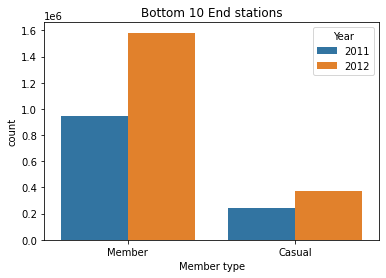

In [111]:
members = bike_copy[["Member type", "Year"]].value_counts().reset_index(name='count')
sns.barplot(x="Member type", y="count", hue = "Year", data=members).set(title='Bottom 10 End stations')



In [46]:
weather_11 = weather_2011.copy(deep = True)

In [43]:
display(weather_11.head(2))
display(weather_11.info())

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,washington dc,2011-01-01,14.1,1.2,8.1,14.1,1.2,7.9,5.2,82.3,...,4.1,3,NaN,2011-01-01T07:26:50,2011-01-01T16:56:37,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
1,washington dc,2011-01-02,14.2,2.0,9.2,14.2,-1.5,7.4,3.7,70.3,...,3.9,2,NaN,2011-01-02T07:26:57,2011-01-02T16:57:26,0.99,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              731 non-null    object 
 1   datetime          731 non-null    object 
 2   tempmax           731 non-null    float64
 3   tempmin           731 non-null    float64
 4   temp              731 non-null    float64
 5   feelslikemax      731 non-null    float64
 6   feelslikemin      731 non-null    float64
 7   feelslike         731 non-null    float64
 8   dew               731 non-null    float64
 9   humidity          731 non-null    float64
 10  precip            731 non-null    float64
 11  precipprob        731 non-null    int64  
 12  precipcover       731 non-null    float64
 13  preciptype        354 non-null    object 
 14  snow              0 non-null      float64
 15  snowdepth         10 non-null     float64
 16  windgust          489 non-null    float64
 1

None

In [47]:

# weather_11.drop(weather_11.loc[["name"]], axis=1, inplace=True) # working code

weather_11.drop(weather_11.columns[[0, 2, 3, 4, 8, 9, 11, 12, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32]], axis = 1, inplace = True)


#weather_11 = weather_11.loc[:, :33]
# weather_11.drop(weather_11.columns[[28 : 33]], axis = 1, inplace = True)


,datetime,feelslikemax,feelslikemin,feelslike,precip,preciptype,snow,snowdepth,windspeed,conditions,description
0,2011-01-01,14.1,1.2,7.9,0.15,rain,NaN,NaN,20.6,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...
1,2011-01-02,14.2,-1.5,7.4,1.07,rain,NaN,NaN,29.4,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...


In [48]:
display(weather_11.head(2))

,datetime,feelslikemax,feelslikemin,feelslike,precip,preciptype,snow,snowdepth,windspeed,conditions,description
0,2011-01-01,14.1,1.2,7.9,0.15,rain,NaN,NaN,20.6,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...
1,2011-01-02,14.2,-1.5,7.4,1.07,rain,NaN,NaN,29.4,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...
